In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("names.csv")

In [3]:
data.shape

(1048575, 5)

In [4]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [5]:
data['Name'].nunique()

51119

In [6]:
#Encoding
data['Gender']=data['Gender'].astype('category').cat.codes

In [7]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,0,7065
1,2,Anna,1880,0,2604
2,3,Emma,1880,0,2003
3,4,Elizabeth,1880,0,1939
4,5,Minnie,1880,0,1746


In [8]:
data1=data.groupby('Name').mean()['Gender'].reset_index()
data1.head()

,Name,Gender
0,Aadam,1.0
1,Aadil,1.0
2,Aage,1.0
3,Aagot,0.0
4,Aaisha,0.0


In [9]:
data1['Gender']=data1['Gender'].astype('int')

In [10]:
import string

In [11]:
letters=list(string.ascii_lowercase)

In [12]:
vocal=dict(zip(letters,range(1,27)))

In [13]:
def wordtonum():
    for i in range(0,data1.shape[0]):
        seq=[vocal[letters.lower()] for letters in data1['Name'][i]]
        data1['Name'][i]=seq

In [14]:
wordtonum()

C:\Users\HP\AppData\Local\Temp\ipykernel_10788\2826680972.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Name'][i]=seq


In [15]:
data1.head()

,Name,Gender
0,"[1, 1, 4, 1, 13]",1
1,"[1, 1, 4, 9, 12]",1
2,"[1, 1, 7, 5]",1
3,"[1, 1, 7, 15, 20]",0
4,"[1, 1, 9, 19, 8, 1]",0


In [16]:
X=data1['Name'].values
y=data1['Gender'].values
name_length=[len(X[i]) for i in range(0,data1.shape[0])]

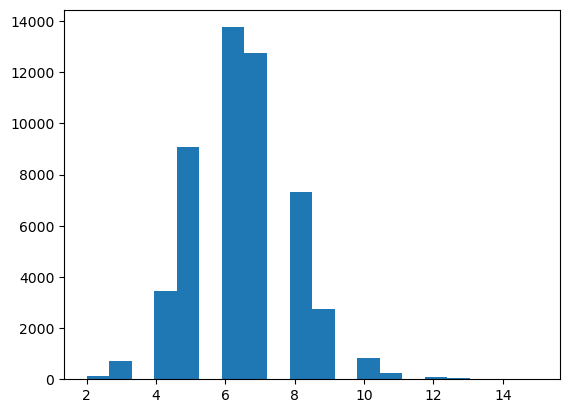

In [17]:
plt.hist(name_length,bins=20)
plt.show()

In [18]:
from tensorflow.keras.utils import pad_sequences

In [19]:
x=pad_sequences(data1['Name'].values,maxlen=14,padding='pre')
x

array([[ 0,  0,  0, ...,  4,  1, 13],
       [ 0,  0,  0, ...,  4,  9, 12],
       [ 0,  0,  0, ...,  1,  7,  5],
       ...,
       [ 0,  0,  0, ..., 16,  8,  1],
       [ 0,  0,  0, ...,  8,  9,  1],
       [ 0,  0,  0, ...,  1, 12, 12]])

In [20]:
from tensorflow.keras.layers import Input,Embedding,Dense,LSTM
from keras.models import Model

In [21]:
vocab_size=len(vocal)+1

In [27]:
inp=Input(shape=(14,))
embed=Embedding(input_dim=vocab_size,output_dim=5)(inp)
lstm1=LSTM(units=32,return_sequences=True)(embed)
lstm2=LSTM(units=64)(lstm1)

out=Dense(units=1,activation='sigmoid')(lstm2)

model1=Model(inputs=inp,outputs=out)

In [28]:
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 14)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 14, 5)             135       
                                                                 
 lstm_2 (LSTM)               (None, 14, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 64)                24832     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 29,896
Trainable params: 29,896
Non-trainable params: 0
_________________________________________________________________


In [29]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
model1.fit(x,y,epochs=10,batch_size=265,validation_split=0.2)

Epoch 1/10
155/155 [==============================] - 18s 56ms/step - loss: 0.5978 - accuracy: 0.7057 - val_loss: 0.5086 - val_accuracy: 0.7578
Epoch 2/10
155/155 [==============================] - 7s 42ms/step - loss: 0.4653 - accuracy: 0.7707 - val_loss: 0.3681 - val_accuracy: 0.8284
Epoch 3/10
155/155 [==============================] - 6s 38ms/step - loss: 0.3995 - accuracy: 0.8105 - val_loss: 0.3593 - val_accuracy: 0.8275
Epoch 4/10
155/155 [==============================] - 6s 37ms/step - loss: 0.3933 - accuracy: 0.8116 - val_loss: 0.3602 - val_accuracy: 0.8302
Epoch 5/10
155/155 [==============================] - 6s 37ms/step - loss: 0.3893 - accuracy: 0.8139 - val_loss: 0.3581 - val_accuracy: 0.8294
Epoch 6/10
155/155 [==============================] - 6s 37ms/step - loss: 0.3872 - accuracy: 0.8150 - val_loss: 0.3590 - val_accuracy: 0.8332
Epoch 7/10
155/155 [==============================] - 6s 37ms/step - loss: 0.3863 - accuracy: 0.8154 - val_loss: 0.3597 - val_accuracy: 0.832

In [38]:
name='rahul'
testin=[vocal[i] for i in name]

x_test=pad_sequences([testin],14)
x_test

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0, 18,  1,  8, 21, 12]])

In [39]:
y_pred=model1.predict(x_test)
if(y_pred>0.5):
    print('name is Male')
else:
    print('name is Female')

1/1 [==============================] - 0s 49ms/step
name is Male
